In [251]:
import cv2
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

In [252]:
#testing scripts for image processing using python
#will adjust later for Zephyr in C


def find_peaks_sum_columns(image, dist):
    '''
    Sums each column and finds peak.
    To be honest, this one doesn't quite work... will keep here as archive in case
    Could work maybe if we can increase the contrast of pleats with background
    '''
    #blur to make image a little better
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    #sum each column
    profile = np.sum(blur, axis=0)

    #gets peaks
    peaks, _ = find_peaks(profile, distance=dist, prominence=5000)
    print(f"Found {len(peaks)} peaks at columns: {peaks}")

    #draws lines at each peak onto image
    copy = image.copy()
    for p in peaks:
        cv2.line(copy, (p, 0), (p, copy.shape[0]), (0, 0, 255), 2)

    #graph that displays brightness at each column index
    plt.plot(profile)
    plt.plot(peaks, profile[peaks], "rx")
    plt.title("Brightness at each column")
    plt.xlabel("Column index")
    plt.ylabel("Summed brightness")
    plt.show()
    
    #image with line
    plt.imshow(cv2.cvtColor(copy, cv2.COLOR_BGR2RGB))
    plt.show()


In [253]:
def find_peaks_morph(image, thresh_val):
    '''
    Shapes the image vertically and takes the morphology gradient.
    '''
    #blur to make image a little better
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    #finds peaks by taking the difference between two versions of the image
    #this being the brighter and darker version
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,15))
    grad = cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, kernel)

    #thresholds
    _, thresh = cv2.threshold(grad, thresh_val, 255, cv2.THRESH_BINARY)

    #gets column sum
    col_sum = np.sum(thresh, axis=0)
    peaks = np.where(col_sum > 0.5*np.max(col_sum))[0]

    copy = image.copy()
    for p in peaks:
        cv2.line(copy, (p, 0), (p, image.shape[0]), (0, 0, 255), 1)

    #shows thresh and post image processing
    plt.imshow(thresh)
    plt.title("thresh")
    plt.show()

    plt.imshow(cv2.cvtColor(copy, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [254]:
def find_peaks_sobel(image, thresh_val):
    '''
    Uses Sobel image processing meaning it measures how much intensity changes
    '''
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)

    #sums columns
    profile = np.sum(np.absolute(sobel), axis=0)

    #find columns with higher than thresh
    peaks = np.argwhere(profile > thresh_val *np.max(profile)).flatten()

    copy = image.copy()
    for p in peaks:
        cv2.line(copy, (p, 0), (p, image.shape[0]), (0,0,255), 2)

    plt.imshow(cv2.cvtColor(copy, cv2.COLOR_BGR2RGB))
    plt.title("Sobel")
    plt.show()


Found 7 peaks at columns: [  7  63 110 150 192 223 255]


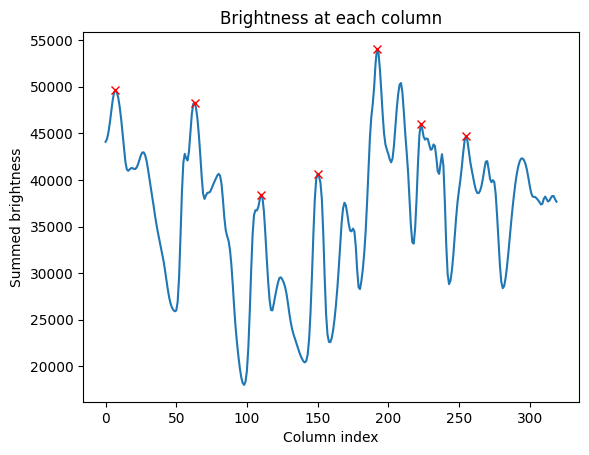

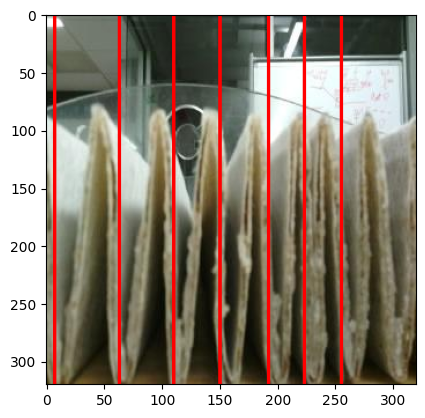

In [255]:
#runs through test folder and applies script

#gets current working directory (not sure why I can't use relative path, only full path)
#but wanted this to work from anyones computer, so didn't add my full path
script_dir = os.getcwd()

#pick which folder you want to analyze
folder_path = os.path.join(script_dir, 'photos', 'photos_close') #close
# folder_path = os.path.join(script_dir, 'photos', 'photos_medium') #medium dist
# folder_path = os.path.join(script_dir, 'photos', 'photos_far') #far dist

for file in os.listdir(folder_path):
    path = os.path.join(folder_path, file)
    image = cv2.imread(path)
    find_peaks_sum_columns(image, 20)
    # find_peaks_morph(image, 75)
    # find_peaks_sobel(image, .65)